In [13]:
import pandas as pd
from IPython.display import display

# List of player names
player_names = [
    "Colin Bergmann", "Brady Kindhart", "Dominic Sharp", "Elias Stevens",
    "Jordan Rosenberg", "Matthew Arnold", "Steven Schnieder", "Josh Herget",
    "Michael Gould", "Gavin Schacher", "Michael Long", "Camden Ruby",
    "Jack Zebig", "Aaris Stolte", "Andy Bunton", "Matt Schuler",
    "Harry Oden", "Nick Daugherty", "Jacob Hager", "Jordan Stucki",
    "Zach Liggett"
]

# Conditional formatting function
def highlight_positive_change(s):
    is_positive = s.diff() > 0
    return ['background-color: green' if v else '' for v in is_positive]

def main():
    excel_file = 'Latest report.xlsx'  # Replace with the actual path to your Excel file

    for player in player_names:
        try:
            # Read the player's sheet into a DataFrame
            df = pd.read_excel(
                excel_file,
                sheet_name=player,
                engine='openpyxl',
                skiprows=8,  # Skipping the first 8 rows to start at line 9
                usecols=['Date', 'Attack Angle (deg)', 'Connection Score']
            )
            
            # Drop NaN rows
            df.dropna(inplace=True)
            
            # Filter data starting from "Sep 07, 2023"
            df['Date'] = pd.to_datetime(df['Date'])
            df = df[df['Date'] >= '2023-09-07']
            
            # Calculate the week
            df['Week'] = df['Date'].dt.to_period('W').dt.to_timestamp()
            
            # Group by week and calculate the average for each group
            df_grouped = df.groupby('Week').mean().reset_index()
            
            # Calculate the change in average attack angle
            df_grouped['Change in Avg Attack Angle'] = df_grouped['Attack Angle (deg)'].diff()
            
            # Create a result DataFrame
            result_df = df_grouped[['Week', 'Attack Angle (deg)', 'Change in Avg Attack Angle', 'Connection Score']]
            
            # Apply the highlighting style
            styled_result = result_df.style.apply(highlight_positive_change, subset=['Connection Score'])
            
            print(f"Data for {player}:")
            display(styled_result)
            
        except Exception as e:
            print(f"An error occurred while processing the sheet {player}: {e}")

if __name__ == "__main__":
    main()


Data for Colin Bergmann:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,11.239075,nan,57.706941
1,2023-09-11 00:00:00,8.702602,-2.536472,60.189591


Data for Brady Kindhart:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,11.801105,nan,56.734807
1,2023-09-11 00:00:00,11.875817,0.074712,55.741830


Data for Dominic Sharp:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,12.836283,nan,57.672566
1,2023-09-11 00:00:00,11.954918,-0.881365,55.377049


Data for Elias Stevens:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,10.981818,nan,57.345455
1,2023-09-11 00:00:00,11.070336,0.088518,58.718654


Data for Jordan Rosenberg:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,15.897727,nan,40.034091
1,2023-09-11 00:00:00,15.288660,-0.609067,35.634021


Data for Matthew Arnold:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,15.776119,nan,55.694030
1,2023-09-11 00:00:00,12.941176,-2.834943,55.151261


Data for Steven Schnieder:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,11.952381,nan,58.857143
1,2023-09-11 00:00:00,11.673913,-0.278468,55.426087


Data for Josh Herget:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,12.427350,nan,53.897436
1,2023-09-11 00:00:00,12.741228,0.313878,52.521930


Data for Michael Gould:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,12.947826,nan,47.869565
1,2023-09-11 00:00:00,12.725888,-0.221938,50.949239


Data for Gavin Schacher:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,8.556391,nan,52.992481
1,2023-09-11 00:00:00,9.604545,1.048154,54.609091


Data for Michael Long:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,14.034783,nan,51.347826
1,2023-09-11 00:00:00,12.138158,-1.896625,50.394737


Data for Camden Ruby:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,7.828283,nan,54.717172
1,2023-09-11 00:00:00,8.292079,0.463796,57.881188


Data for Jack Zebig:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,14.443396,nan,53.811321
1,2023-09-11 00:00:00,12.175824,-2.267572,53.395604


Data for Aaris Stolte:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,8.944444,nan,63.920635
1,2023-09-11 00:00:00,7.759036,-1.185408,65.198795


Data for Andy Bunton:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,14.000000,nan,54.562500
1,2023-09-11 00:00:00,16.890110,2.890110,51.032967


Data for Matt Schuler:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,9.727273,nan,55.636364
1,2023-09-11 00:00:00,6.621469,-3.105804,57.316384


Data for Harry Oden:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,12.114035,nan,51.745614
1,2023-09-11 00:00:00,10.489362,-1.624673,52.617021


Data for Nick Daugherty:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,10.072289,nan,56.578313
1,2023-09-11 00:00:00,12.078125,2.005836,57.640625


Data for Jacob Hager:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-04 00:00:00,12.853659,nan,52.146341
1,2023-09-11 00:00:00,9.016000,-3.837659,53.912000


Data for Jordan Stucki:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score


Data for Zach Liggett:


,Week,Attack Angle (deg),Change in Avg Attack Angle,Connection Score
0,2023-09-11 00:00:00,6.247423,nan,60.773196


In [14]:
import pandas as pd
from IPython.display import display

# List of player names
player_names = [
    "Colin Bergmann", "Brady Kindhart", "Dominic Sharp", "Elias Stevens",
    "Jordan Rosenberg", "Matthew Arnold", "Steven Schnieder", "Josh Herget",
    "Michael Gould", "Gavin Schacher", "Michael Long", "Camden Ruby",
    "Jack Zebig", "Aaris Stolte", "Andy Bunton", "Matt Schuler",
    "Harry Oden", "Nick Daugherty", "Jacob Hager", "Jordan Stucki",
    "Zach Liggett"
]

# Conditional formatting function
def highlight_changes(s):
    diff = s.diff()
    return ['background-color: green' if v > 1.5 else 'background-color: yellow' if v < -1.5 else '' for v in diff]

def main():
    excel_file = 'Latest report.xlsx'  # Replace with the actual path to your Excel file

    for player in player_names:
        try:
            # Read the player's sheet into a DataFrame
            df = pd.read_excel(
                excel_file,
                sheet_name=player,
                engine='openpyxl',
                skiprows=8,  # Skipping the first 8 rows to start at line 9
                usecols=['Date', 'Connection Score', 'Rotation Score', 'Plane Score']
            )
            
            # Drop NaN rows
            df.dropna(inplace=True)
            
            # Filter data starting from "Sep 07, 2023"
            df['Date'] = pd.to_datetime(df['Date'])
            df = df[df['Date'] >= '2023-09-07']
            
            # Calculate the week
            df['Week'] = df['Date'].dt.to_period('W').dt.to_timestamp()
            
            # Group by week and calculate the average for each group
            df_grouped = df.groupby('Week').mean().reset_index()
            
            # Apply the highlighting style
            styled_result = df_grouped.style.apply(highlight_changes, subset=['Connection Score', 'Rotation Score', 'Plane Score'])
            
            print(f"Data for {player}:")
            display(styled_result)
            
        except Exception as e:
            print(f"An error occurred while processing the sheet {player}: {e}")

if __name__ == "__main__":
    main()


Data for Colin Bergmann:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,54.912596,57.706941,44.249357
1,2023-09-11 00:00:00,54.680297,60.189591,43.799257


Data for Brady Kindhart:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,62.977901,56.734807,50.801105
1,2023-09-11 00:00:00,60.856209,55.741830,52.496732


Data for Dominic Sharp:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,49.610619,57.672566,56.017699
1,2023-09-11 00:00:00,47.713115,55.377049,55.307377


Data for Elias Stevens:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,44.745455,57.345455,55.054545
1,2023-09-11 00:00:00,44.247706,58.718654,54.015291


Data for Jordan Rosenberg:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,44.448864,40.034091,39.329545
1,2023-09-11 00:00:00,40.180412,35.634021,40.783505


Data for Matthew Arnold:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,36.940299,55.694030,45.940299
1,2023-09-11 00:00:00,44.285714,55.151261,45.117647


Data for Steven Schnieder:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,34.277778,58.857143,36.174603
1,2023-09-11 00:00:00,29.986957,55.426087,34.678261


Data for Josh Herget:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,49.461538,53.897436,52.153846
1,2023-09-11 00:00:00,48.942982,52.521930,52.087719


Data for Michael Gould:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,48.747826,47.869565,62.121739
1,2023-09-11 00:00:00,48.081218,50.949239,62.847716


Data for Gavin Schacher:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,57.466165,52.992481,45.225564
1,2023-09-11 00:00:00,55.181818,54.609091,45.686364


Data for Michael Long:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,53.556522,51.347826,64.486957
1,2023-09-11 00:00:00,48.532895,50.394737,68.769737


Data for Camden Ruby:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,59.080808,54.717172,55.292929
1,2023-09-11 00:00:00,57.945545,57.881188,54.173267


Data for Jack Zebig:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,40.245283,53.811321,38.056604
1,2023-09-11 00:00:00,51.010989,53.395604,39.956044


Data for Aaris Stolte:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,49.000000,63.920635,40.873016
1,2023-09-11 00:00:00,51.487952,65.198795,40.554217


Data for Andy Bunton:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,60.812500,54.562500,38.302083
1,2023-09-11 00:00:00,58.093407,51.032967,36.472527


Data for Matt Schuler:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,62.113636,55.636364,60.738636
1,2023-09-11 00:00:00,64.276836,57.316384,57.372881


Data for Harry Oden:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,57.245614,51.745614,54.964912
1,2023-09-11 00:00:00,55.021277,52.617021,51.460993


Data for Nick Daugherty:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,56.289157,56.578313,44.710843
1,2023-09-11 00:00:00,54.132812,57.640625,46.015625


Data for Jacob Hager:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-04 00:00:00,49.658537,52.146341,51.073171
1,2023-09-11 00:00:00,51.608000,53.912000,54.648000


Data for Jordan Stucki:


,Week,Plane Score,Connection Score,Rotation Score


Data for Zach Liggett:


,Week,Plane Score,Connection Score,Rotation Score
0,2023-09-11 00:00:00,58.443299,60.773196,53.690722


In [39]:
import pandas as pd
from IPython.display import display

# List of player names
player_names = [
    "Colin Bergmann", "Brady Kindhart", "Dominic Sharp", "Elias Stevens",
    "Jordan Rosenberg", "Matthew Arnold", "Steven Schnieder", "Josh Herget",
    "Michael Gould", "Gavin Schacher", "Michael Long", "Camden Ruby",
    "Jack Zebig", "Aaris Stolte", "Andy Bunton", "Matt Schuler",
    "Harry Oden", "Nick Daugherty", "Jacob Hager", "Jordan Stucki",
    "Zach Liggett"
]

# Conditional formatting function
def highlight_changes(s, green_threshold, light_green_threshold, yellow_threshold):
    diff = s.diff()
    return [
        'background-color: #008000' if v >= green_threshold else  # Dark green
        'background-color: #ADFF2F' if light_green_threshold <= v < green_threshold else  # Light green
        'background-color: yellow' if v <= -yellow_threshold else  # Yellow for losses
        'background-color: none'
        for v in diff
    ]

def main():
    excel_file = 'Latest report.xlsx'

    for player in player_names:
        try:
            df = pd.read_excel(
                excel_file,
                sheet_name=player,
                engine='openpyxl',
                skiprows=8,
                usecols=['Date', 'Bat Speed (mph)', 'Rotational Acceleration (g)', 'Rotation Score']
            )
            
            df.dropna(inplace=True)
            df['Date'] = pd.to_datetime(df['Date'])
            df = df[df['Date'] >= '2023-09-07']
            df['Week'] = df['Date'].dt.to_period('W').dt.to_timestamp()
            
            df_grouped = df.groupby('Week').agg({
                'Bat Speed (mph)': ['max', 'mean'],
                'Rotational Acceleration (g)': ['max', 'mean'],
                'Rotation Score': ['mean']
            }).reset_index()
            
            df_grouped.columns = [f"{a}_{b}" if b else a for a, b in df_grouped.columns]
            
            styled_result = df_grouped.style.apply(
                highlight_changes, subset=[
                    'Bat Speed (mph)_max', 'Bat Speed (mph)_mean'
                ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
            ).apply(
                highlight_changes, subset=[
                    'Rotational Acceleration (g)_max', 'Rotational Acceleration (g)_mean'
                ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0 
            ).apply(
                highlight_changes, subset=['Rotation Score_mean'],
                green_threshold=1.5, light_green_threshold=0.75, yellow_threshold=1.5
            )
            
            print(f"Data for {player}:")
            display(styled_result)
            
        except Exception as e:
            print(f"An error occurred while processing the sheet for {player}: {e}")

if __name__ == "__main__":
    main()


Data for Colin Bergmann:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,74.600000,68.430077,18.700000,10.520308,44.249357
1,2023-09-11 00:00:00,76.600000,69.528625,17.200000,10.318959,43.799257


Data for Brady Kindhart:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,72.800000,67.494475,18.300000,13.209945,50.801105
1,2023-09-11 00:00:00,74.100000,68.823203,19.800000,13.914379,52.496732


Data for Dominic Sharp:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,71.100000,65.782301,20.100000,15.376549,56.017699
1,2023-09-11 00:00:00,77.800000,66.253689,22.300000,15.061066,55.307377


Data for Elias Stevens:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,75.900000,69.840909,22.300000,14.976364,55.054545
1,2023-09-11 00:00:00,81.200000,70.838838,23.700000,14.540979,54.015291


Data for Jordan Rosenberg:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,70.800000,62.381250,12.900000,8.492614,39.329545
1,2023-09-11 00:00:00,72.500000,64.915464,13.900000,9.086598,40.783505


Data for Matthew Arnold:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,75.300000,67.723881,14.100000,11.208209,45.940299
1,2023-09-11 00:00:00,76.000000,69.252941,14.700000,10.887395,45.117647


Data for Steven Schnieder:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,72.300000,66.286508,12.200000,7.196825,36.174603
1,2023-09-11 00:00:00,73.400000,66.687826,10.400000,6.565217,34.678261


Data for Josh Herget:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,75.100000,68.764957,20.400000,13.775214,52.153846
1,2023-09-11 00:00:00,75.400000,68.676316,20.800000,13.739035,52.087719


Data for Michael Gould:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,73.300000,66.934783,26.700000,17.903478,62.121739
1,2023-09-11 00:00:00,72.800000,67.452792,24.300000,18.186802,62.847716


Data for Gavin Schacher:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,67.900000,62.100000,14.600000,10.905263,45.225564
1,2023-09-11 00:00:00,70.200000,64.232273,14.500000,11.107727,45.686364


Data for Michael Long:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,80.300000,69.167826,25.900000,18.862609,64.486957
1,2023-09-11 00:00:00,79.100000,71.707895,28.300000,20.681579,68.769737


Data for Camden Ruby:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,74.900000,69.984848,22.700000,15.083838,55.292929
1,2023-09-11 00:00:00,76.700000,70.029208,22.400000,14.598515,54.173267


Data for Jack Zebig:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,72.400000,64.193396,10.500000,7.983019,38.056604
1,2023-09-11 00:00:00,71.800000,65.895055,11.300000,8.763187,39.956044


Data for Aaris Stolte:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,68.800000,64.164286,14.100000,9.136508,40.873016
1,2023-09-11 00:00:00,68.700000,63.733133,16.000000,8.993976,40.554217


Data for Andy Bunton:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,67.700000,58.892708,11.600000,8.091667,38.302083
1,2023-09-11 00:00:00,67.300000,61.748901,13.100000,7.321978,36.472527


Data for Matt Schuler:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,81.100000,73.111364,22.800000,17.315909,60.738636
1,2023-09-11 00:00:00,89.800000,72.148588,21.400000,15.940678,57.372881


Data for Harry Oden:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,72.200000,65.971053,18.700000,14.904386,54.964912
1,2023-09-11 00:00:00,70.700000,65.301418,17.400000,13.486525,51.460993


Data for Nick Daugherty:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,72.900000,66.137349,15.200000,10.703614,44.710843
1,2023-09-11 00:00:00,75.900000,68.442969,18.300000,11.246875,46.015625


Data for Jacob Hager:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,77.600000,72.292683,18.600000,13.328049,51.073171
1,2023-09-11 00:00:00,76.800000,71.897600,18.200000,14.791200,54.648000


Data for Jordan Stucki:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean


Data for Zach Liggett:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-11 00:00:00,71.400000,65.737113,19.500000,14.430928,53.690722


In [49]:
import pandas as pd
from IPython.display import display

# List of player names
player_names = [
    "Colin Bergmann", "Brady Kindhart", "Dominic Sharp", "Elias Stevens",
    "Jordan Rosenberg", "Matthew Arnold", "Steven Schnieder", "Josh Herget",
    "Michael Gould", "Gavin Schacher", "Michael Long", "Camden Ruby",
    "Jack Zebig", "Aaris Stolte", "Andy Bunton", "Matt Schuler",
    "Harry Oden", "Nick Daugherty", "Jacob Hager"
]

# Initialize an empty DataFrame for the team average
team_df = pd.DataFrame()

# Conditional formatting function
def highlight_changes(s, green_threshold, light_green_threshold, yellow_threshold):
    diff = s.diff()
    return [
        'background-color: #008000' if v >= green_threshold else  # Dark green
        'background-color: #ADFF2F' if light_green_threshold <= v < green_threshold else  # Light green
        'background-color: yellow' if v <= -yellow_threshold else  # Yellow for losses
        'background-color: none'
        for v in diff
    ]

def main():
    global team_df
    excel_file = 'Latest report.xlsx'

    for player in player_names:
        try:
            df = pd.read_excel(
                excel_file,
                sheet_name=player,
                engine='openpyxl',
                skiprows=8,
                usecols=['Date', 'Bat Speed (mph)', 'Rotational Acceleration (g)', 'Rotation Score']
            )
            
            df.dropna(inplace=True)
            df['Date'] = pd.to_datetime(df['Date'])
            df = df[df['Date'] >= '2023-09-07']
            df['Week'] = df['Date'].dt.to_period('W').dt.to_timestamp()

            # Special handling for Matt Schuler
            if player == "Matt Schuler":
                second_week = df[df['Week'] == df['Week'].max()].copy()
                second_best_speed = second_week['Bat Speed (mph)'].nlargest(2).iloc[-1]
                second_week.loc[second_week['Bat Speed (mph)'].idxmax(), 'Bat Speed (mph)'] = second_best_speed
                df.update(second_week)

            df_grouped = df.groupby('Week').agg({
                'Bat Speed (mph)': ['max', 'mean'],
                'Rotational Acceleration (g)': ['max', 'mean'],
                'Rotation Score': ['mean']
            }).reset_index()
            
            df_grouped.columns = [f"{a}_{b}" if b else a for a, b in df_grouped.columns]

            team_df = pd.concat([team_df, df_grouped], ignore_index=True)

            styled_result = df_grouped.style.apply(
                highlight_changes, subset=[
                    'Bat Speed (mph)_max', 'Bat Speed (mph)_mean'
                ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
            ).apply(
                highlight_changes, subset=[
                    'Rotational Acceleration (g)_max', 'Rotational Acceleration (g)_mean'
                ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0 
            ).apply(
                highlight_changes, subset=['Rotation Score_mean'],
                green_threshold=1.5, light_green_threshold=0.75, yellow_threshold=1.5
            )
            
            print(f"Data for {player}:")
            display(styled_result)
            
        except Exception as e:
            print(f"An error occurred while processing the sheet for {player}: {e}")

    # Calculate and display team averages
    team_avg = team_df.groupby('Week').mean().reset_index()
    styled_team_avg = team_avg.style.apply(
        highlight_changes, subset=[
            'Bat Speed (mph)_max', 'Bat Speed (mph)_mean'
        ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
    ).apply(
        highlight_changes, subset=[
            'Rotational Acceleration (g)_max', 'Rotational Acceleration (g)_mean'
        ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
    ).apply(
        highlight_changes, subset=['Rotation Score_mean'],
        green_threshold=1.5, light_green_threshold=0.75, yellow_threshold=1.5
    )

    print("Team Averages:")
    display(styled_team_avg)

if __name__ == "__main__":
    main()


Data for Colin Bergmann:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,74.600000,68.430077,18.700000,10.520308,44.249357
1,2023-09-11 00:00:00,76.600000,69.528625,17.200000,10.318959,43.799257


Data for Brady Kindhart:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,72.800000,67.494475,18.300000,13.209945,50.801105
1,2023-09-11 00:00:00,74.100000,68.823203,19.800000,13.914379,52.496732


Data for Dominic Sharp:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,71.100000,65.782301,20.100000,15.376549,56.017699
1,2023-09-11 00:00:00,77.800000,66.253689,22.300000,15.061066,55.307377


Data for Elias Stevens:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,75.900000,69.840909,22.300000,14.976364,55.054545
1,2023-09-11 00:00:00,81.200000,70.838838,23.700000,14.540979,54.015291


Data for Jordan Rosenberg:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,70.800000,62.381250,12.900000,8.492614,39.329545
1,2023-09-11 00:00:00,72.500000,64.915464,13.900000,9.086598,40.783505


Data for Matthew Arnold:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,75.300000,67.723881,14.100000,11.208209,45.940299
1,2023-09-11 00:00:00,76.000000,69.252941,14.700000,10.887395,45.117647


Data for Steven Schnieder:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,72.300000,66.286508,12.200000,7.196825,36.174603
1,2023-09-11 00:00:00,73.400000,66.687826,10.400000,6.565217,34.678261


Data for Josh Herget:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,75.100000,68.764957,20.400000,13.775214,52.153846
1,2023-09-11 00:00:00,75.400000,68.676316,20.800000,13.739035,52.087719


Data for Michael Gould:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,73.300000,66.934783,26.700000,17.903478,62.121739
1,2023-09-11 00:00:00,72.800000,67.452792,24.300000,18.186802,62.847716


Data for Gavin Schacher:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,67.900000,62.100000,14.600000,10.905263,45.225564
1,2023-09-11 00:00:00,70.200000,64.232273,14.500000,11.107727,45.686364


Data for Michael Long:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,80.300000,69.167826,25.900000,18.862609,64.486957
1,2023-09-11 00:00:00,79.100000,71.707895,28.300000,20.681579,68.769737


Data for Camden Ruby:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,74.900000,69.984848,22.700000,15.083838,55.292929
1,2023-09-11 00:00:00,76.700000,70.029208,22.400000,14.598515,54.173267


Data for Jack Zebig:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,72.400000,64.193396,10.500000,7.983019,38.056604
1,2023-09-11 00:00:00,71.800000,65.895055,11.300000,8.763187,39.956044


Data for Aaris Stolte:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,68.800000,64.164286,14.100000,9.136508,40.873016
1,2023-09-11 00:00:00,68.700000,63.733133,16.000000,8.993976,40.554217


Data for Andy Bunton:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,67.700000,58.892708,11.600000,8.091667,38.302083
1,2023-09-11 00:00:00,67.300000,61.748901,13.100000,7.321978,36.472527


Data for Matt Schuler:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,81.100000,73.111364,22.800000,17.315909,60.738636
1,2023-09-11 00:00:00,78.600000,72.085311,21.400000,15.940678,57.372881


Data for Harry Oden:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,72.200000,65.971053,18.700000,14.904386,54.964912
1,2023-09-11 00:00:00,70.700000,65.301418,17.400000,13.486525,51.460993


Data for Nick Daugherty:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,72.900000,66.137349,15.200000,10.703614,44.710843
1,2023-09-11 00:00:00,75.900000,68.442969,18.300000,11.246875,46.015625


Data for Jacob Hager:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,77.600000,72.292683,18.600000,13.328049,51.073171
1,2023-09-11 00:00:00,76.800000,71.897600,18.200000,14.791200,54.648000


Team Averages:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean
0,2023-09-04 00:00:00,73.526316,66.823929,17.915789,12.577598,49.240392
1,2023-09-11 00:00:00,74.505263,67.763340,18.315789,12.591193,49.275956


In [50]:
import pandas as pd
from IPython.display import display

# List of player names
player_names = [
    "Colin Bergmann", "Brady Kindhart", "Dominic Sharp", "Elias Stevens",
    "Jordan Rosenberg", "Matthew Arnold", "Steven Schnieder", "Josh Herget",
    "Michael Gould", "Gavin Schacher", "Michael Long", "Camden Ruby",
    "Jack Zebig", "Aaris Stolte", "Andy Bunton", "Matt Schuler",
    "Harry Oden", "Nick Daugherty", "Jacob Hager"
]

# Initialize an empty DataFrame for the team average
team_df = pd.DataFrame()

# Conditional formatting function
def highlight_changes(s, green_threshold, light_green_threshold, yellow_threshold):
    diff = s.diff()
    return [
        'background-color: #008000' if v >= green_threshold else  # Dark green
        'background-color: #ADFF2F' if light_green_threshold <= v < green_threshold else  # Light green
        'background-color: yellow' if v <= -yellow_threshold else  # Yellow for losses
        'background-color: none'
        for v in diff
    ]

def main():
    global team_df
    excel_file = 'Latest report.xlsx'

    for player in player_names:
        try:
            df = pd.read_excel(
                excel_file,
                sheet_name=player,
                engine='openpyxl',
                skiprows=8,
                usecols=[
                    'Date', 'Bat Speed (mph)', 'Rotational Acceleration (g)',
                    'Rotation Score', 'Plane Score', 'Connection Score'
                ]
            )
            
            df.dropna(inplace=True)
            df['Date'] = pd.to_datetime(df['Date'])
            df = df[df['Date'] >= '2023-09-07']
            df['Week'] = df['Date'].dt.to_period('W').dt.to_timestamp()

            # Special handling for Matt Schuler
            if player == "Matt Schuler":
                second_week = df[df['Week'] == df['Week'].max()].copy()
                second_best_speed = second_week['Bat Speed (mph)'].nlargest(2).iloc[-1]
                second_week.loc[second_week['Bat Speed (mph)'].idxmax(), 'Bat Speed (mph)'] = second_best_speed
                df.update(second_week)

            df_grouped = df.groupby('Week').agg({
                'Bat Speed (mph)': ['max', 'mean'],
                'Rotational Acceleration (g)': ['max', 'mean'],
                'Rotation Score': ['mean'],
                'Plane Score': ['mean'],
                'Connection Score': ['mean']
            }).reset_index()
            
            df_grouped.columns = [f"{a}_{b}" if b else a for a, b in df_grouped.columns]

            team_df = pd.concat([team_df, df_grouped], ignore_index=True)

            styled_result = df_grouped.style.apply(
                highlight_changes, subset=[
                    'Bat Speed (mph)_max', 'Bat Speed (mph)_mean'
                ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
            ).apply(
                highlight_changes, subset=[
                    'Rotational Acceleration (g)_max', 'Rotational Acceleration (g)_mean'
                ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0 
            ).apply(
                highlight_changes, subset=[
                    'Rotation Score_mean', 'Plane Score_mean', 'Connection Score_mean'
                ],
                green_threshold=1.5, light_green_threshold=0.75, yellow_threshold=1.5
            )
            
            print(f"Data for {player}:")
            display(styled_result)
            
        except Exception as e:
            print(f"An error occurred while processing the sheet for {player}: {e}")

    # Calculate and display team averages
    team_avg = team_df.groupby('Week').mean().reset_index()
    styled_team_avg = team_avg.style.apply(
        highlight_changes, subset=[
            'Bat Speed (mph)_max', 'Bat Speed (mph)_mean'
        ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
    ).apply(
        highlight_changes, subset=[
            'Rotational Acceleration (g)_max', 'Rotational Acceleration (g)_mean'
        ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
    ).apply(
        highlight_changes, subset=[
            'Rotation Score_mean', 'Plane Score_mean', 'Connection Score_mean'
        ],
        green_threshold=1.5, light_green_threshold=0.75, yellow_threshold=1.5
    )

    print("Team Averages:")
    display(styled_team_avg)

if __name__ == "__main__":
    main()


Data for Colin Bergmann:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,74.600000,68.430077,18.700000,10.520308,44.249357,54.912596,57.706941
1,2023-09-11 00:00:00,76.600000,69.528625,17.200000,10.318959,43.799257,54.680297,60.189591


Data for Brady Kindhart:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,72.800000,67.494475,18.300000,13.209945,50.801105,62.977901,56.734807
1,2023-09-11 00:00:00,74.100000,68.823203,19.800000,13.914379,52.496732,60.856209,55.741830


Data for Dominic Sharp:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,71.100000,65.782301,20.100000,15.376549,56.017699,49.610619,57.672566
1,2023-09-11 00:00:00,77.800000,66.253689,22.300000,15.061066,55.307377,47.713115,55.377049


Data for Elias Stevens:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,75.900000,69.840909,22.300000,14.976364,55.054545,44.745455,57.345455
1,2023-09-11 00:00:00,81.200000,70.838838,23.700000,14.540979,54.015291,44.247706,58.718654


Data for Jordan Rosenberg:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,70.800000,62.381250,12.900000,8.492614,39.329545,44.448864,40.034091
1,2023-09-11 00:00:00,72.500000,64.915464,13.900000,9.086598,40.783505,40.180412,35.634021


Data for Matthew Arnold:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,75.300000,67.723881,14.100000,11.208209,45.940299,36.940299,55.694030
1,2023-09-11 00:00:00,76.000000,69.252941,14.700000,10.887395,45.117647,44.285714,55.151261


Data for Steven Schnieder:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,72.300000,66.286508,12.200000,7.196825,36.174603,34.277778,58.857143
1,2023-09-11 00:00:00,73.400000,66.687826,10.400000,6.565217,34.678261,29.986957,55.426087


Data for Josh Herget:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,75.100000,68.764957,20.400000,13.775214,52.153846,49.461538,53.897436
1,2023-09-11 00:00:00,75.400000,68.676316,20.800000,13.739035,52.087719,48.942982,52.521930


Data for Michael Gould:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,73.300000,66.934783,26.700000,17.903478,62.121739,48.747826,47.869565
1,2023-09-11 00:00:00,72.800000,67.452792,24.300000,18.186802,62.847716,48.081218,50.949239


Data for Gavin Schacher:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,67.900000,62.100000,14.600000,10.905263,45.225564,57.466165,52.992481
1,2023-09-11 00:00:00,70.200000,64.232273,14.500000,11.107727,45.686364,55.181818,54.609091


Data for Michael Long:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,80.300000,69.167826,25.900000,18.862609,64.486957,53.556522,51.347826
1,2023-09-11 00:00:00,79.100000,71.707895,28.300000,20.681579,68.769737,48.532895,50.394737


Data for Camden Ruby:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,74.900000,69.984848,22.700000,15.083838,55.292929,59.080808,54.717172
1,2023-09-11 00:00:00,76.700000,70.029208,22.400000,14.598515,54.173267,57.945545,57.881188


Data for Jack Zebig:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,72.400000,64.193396,10.500000,7.983019,38.056604,40.245283,53.811321
1,2023-09-11 00:00:00,71.800000,65.895055,11.300000,8.763187,39.956044,51.010989,53.395604


Data for Aaris Stolte:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,68.800000,64.164286,14.100000,9.136508,40.873016,49.000000,63.920635
1,2023-09-11 00:00:00,68.700000,63.733133,16.000000,8.993976,40.554217,51.487952,65.198795


Data for Andy Bunton:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,67.700000,58.892708,11.600000,8.091667,38.302083,60.812500,54.562500
1,2023-09-11 00:00:00,67.300000,61.748901,13.100000,7.321978,36.472527,58.093407,51.032967


Data for Matt Schuler:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,81.100000,73.111364,22.800000,17.315909,60.738636,62.113636,55.636364
1,2023-09-11 00:00:00,78.600000,72.085311,21.400000,15.940678,57.372881,64.276836,57.316384


Data for Harry Oden:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,72.200000,65.971053,18.700000,14.904386,54.964912,57.245614,51.745614
1,2023-09-11 00:00:00,70.700000,65.301418,17.400000,13.486525,51.460993,55.021277,52.617021


Data for Nick Daugherty:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,72.900000,66.137349,15.200000,10.703614,44.710843,56.289157,56.578313
1,2023-09-11 00:00:00,75.900000,68.442969,18.300000,11.246875,46.015625,54.132812,57.640625


Data for Jacob Hager:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,77.600000,72.292683,18.600000,13.328049,51.073171,49.658537,52.146341
1,2023-09-11 00:00:00,76.800000,71.897600,18.200000,14.791200,54.648000,51.608000,53.912000


Team Averages:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean
0,2023-09-04 00:00:00,73.526316,66.823929,17.915789,12.577598,49.240392,51.136374,54.382663
1,2023-09-11 00:00:00,74.505263,67.763340,18.315789,12.591193,49.275956,50.856113,54.405688


In [52]:
import pandas as pd
from IPython.display import display

# List of player names
player_names = [
    "Colin Bergmann", "Brady Kindhart", "Dominic Sharp", "Elias Stevens",
    "Jordan Rosenberg", "Matthew Arnold", "Steven Schnieder", "Josh Herget",
    "Michael Gould", "Gavin Schacher", "Michael Long", "Camden Ruby",
    "Jack Zebig", "Aaris Stolte", "Andy Bunton", "Matt Schuler",
    "Harry Oden", "Nick Daugherty", "Jacob Hager"
]

excluded_players = ["Jordan Stucki", "Zach Liggett"]

# Initialize an empty DataFrame for the team average
team_df = pd.DataFrame()

# Conditional formatting function for most metrics
def highlight_changes(s, green_threshold, light_green_threshold, yellow_threshold):
    diff = s.diff()
    return [
        'background-color: #008000' if v >= green_threshold else 
        'background-color: #ADFF2F' if light_green_threshold <= v < green_threshold else 
        'background-color: yellow' if v <= -yellow_threshold else 
        'background-color: none' 
        for v in diff
    ]

# Conditional formatting function for Time to Contact
def highlight_time_to_contact(s):
    diff = s.pct_change() * 100
    return [
        'background-color: #008000' if v <= -5 else 
        'background-color: #ADFF2F' if -5 < v <= -2.5 else 
        'background-color: yellow' if v >= 5 else 
        'background-color: none' 
        for v in diff
    ]

def main():
    global team_df
    excel_file = 'Latest report.xlsx'

    for player in player_names:
        try:
            df = pd.read_excel(
                excel_file,
                sheet_name=player,
                engine='openpyxl',
                skiprows=8,
                usecols=['Date', 'Bat Speed (mph)', 'Rotational Acceleration (g)', 'Rotation Score', 'Plane Score', 'Connection Score', 'Time to Contact (sec)']
            )
            
            df.dropna(inplace=True)
            df['Date'] = pd.to_datetime(df['Date'])
            df = df[df['Date'] >= '2023-09-07']
            df['Week'] = df['Date'].dt.to_period('W').dt.to_timestamp()
            
            # Special handling for Matt Schuler
            if player == "Matt Schuler":
                second_week = df[df['Week'] == df['Week'].max()].copy()
                second_best_speed = second_week['Bat Speed (mph)'].nlargest(2).iloc[-1]
                second_week.loc[second_week['Bat Speed (mph)'].idxmax(), 'Bat Speed (mph)'] = second_best_speed
                df.update(second_week)

            df_grouped = df.groupby('Week').agg({
                'Bat Speed (mph)': ['max', 'mean'],
                'Rotational Acceleration (g)': ['max', 'mean'],
                'Rotation Score': ['mean'],
                'Plane Score': ['mean'],
                'Connection Score': ['mean'],
                'Time to Contact (sec)': ['mean']
            }).reset_index()
            
            df_grouped.columns = [f"{a}_{b}" if b else a for a, b in df_grouped.columns]
            
            if player not in excluded_players:
                team_df = pd.concat([team_df, df_grouped], ignore_index=True)
            
            styled_result = df_grouped.style.apply(
                highlight_changes, subset=[
                    'Bat Speed (mph)_max', 'Bat Speed (mph)_mean',
                    'Rotational Acceleration (g)_max', 'Rotational Acceleration (g)_mean',
                    'Rotation Score_mean', 'Plane Score_mean', 'Connection Score_mean'
                ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
            ).apply(
                highlight_time_to_contact,
                subset=['Time to Contact (sec)_mean']
            )
            
            print(f"Data for {player}:")
            display(styled_result)
            
        except Exception as e:
            print(f"An error occurred while processing the sheet for {player}: {e}")

    # Calculate and display team averages
    team_avg = team_df.groupby('Week').mean().reset_index()
    styled_team_avg = team_avg.style.apply(
        highlight_changes, subset=[
            'Bat Speed (mph)_max', 'Bat Speed (mph)_mean',
            'Rotational Acceleration (g)_max', 'Rotational Acceleration (g)_mean',
            'Rotation Score_mean', 'Plane Score_mean', 'Connection Score_mean'
        ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
    ).apply(
        highlight_time_to_contact,
        subset=['Time to Contact (sec)_mean']
    )
    
    print("Team Averages:")
    display(styled_team_avg)

if __name__ == "__main__":
    main()


Data for Colin Bergmann:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,74.600000,68.430077,18.700000,10.520308,44.249357,54.912596,57.706941,0.152699
1,2023-09-11 00:00:00,76.600000,69.528625,17.200000,10.318959,43.799257,54.680297,60.189591,0.147621


Data for Brady Kindhart:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,72.800000,67.494475,18.300000,13.209945,50.801105,62.977901,56.734807,0.153536
1,2023-09-11 00:00:00,74.100000,68.823203,19.800000,13.914379,52.496732,60.856209,55.741830,0.150294


Data for Dominic Sharp:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,71.100000,65.782301,20.100000,15.376549,56.017699,49.610619,57.672566,0.149381
1,2023-09-11 00:00:00,77.800000,66.253689,22.300000,15.061066,55.307377,47.713115,55.377049,0.148443


Data for Elias Stevens:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,75.900000,69.840909,22.300000,14.976364,55.054545,44.745455,57.345455,0.148636
1,2023-09-11 00:00:00,81.200000,70.838838,23.700000,14.540979,54.015291,44.247706,58.718654,0.147890


Data for Jordan Rosenberg:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,70.800000,62.381250,12.900000,8.492614,39.329545,44.448864,40.034091,0.162784
1,2023-09-11 00:00:00,72.500000,64.915464,13.900000,9.086598,40.783505,40.180412,35.634021,0.158711


Data for Matthew Arnold:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,75.300000,67.723881,14.100000,11.208209,45.940299,36.940299,55.694030,0.151716
1,2023-09-11 00:00:00,76.000000,69.252941,14.700000,10.887395,45.117647,44.285714,55.151261,0.146891


Data for Steven Schnieder:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,72.300000,66.286508,12.200000,7.196825,36.174603,34.277778,58.857143,0.160159
1,2023-09-11 00:00:00,73.400000,66.687826,10.400000,6.565217,34.678261,29.986957,55.426087,0.158913


Data for Josh Herget:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,75.100000,68.764957,20.400000,13.775214,52.153846,49.461538,53.897436,0.151453
1,2023-09-11 00:00:00,75.400000,68.676316,20.800000,13.739035,52.087719,48.942982,52.521930,0.155877


Data for Michael Gould:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,73.300000,66.934783,26.700000,17.903478,62.121739,48.747826,47.869565,0.135043
1,2023-09-11 00:00:00,72.800000,67.452792,24.300000,18.186802,62.847716,48.081218,50.949239,0.135584


Data for Gavin Schacher:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,67.900000,62.100000,14.600000,10.905263,45.225564,57.466165,52.992481,0.152030
1,2023-09-11 00:00:00,70.200000,64.232273,14.500000,11.107727,45.686364,55.181818,54.609091,0.150091


Data for Michael Long:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,80.300000,69.167826,25.900000,18.862609,64.486957,53.556522,51.347826,0.140087
1,2023-09-11 00:00:00,79.100000,71.707895,28.300000,20.681579,68.769737,48.532895,50.394737,0.138026


Data for Camden Ruby:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,74.900000,69.984848,22.700000,15.083838,55.292929,59.080808,54.717172,0.134949
1,2023-09-11 00:00:00,76.700000,70.029208,22.400000,14.598515,54.173267,57.945545,57.881188,0.135891


Data for Jack Zebig:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,72.400000,64.193396,10.500000,7.983019,38.056604,40.245283,53.811321,0.161604
1,2023-09-11 00:00:00,71.800000,65.895055,11.300000,8.763187,39.956044,51.010989,53.395604,0.155110


Data for Aaris Stolte:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,68.800000,64.164286,14.100000,9.136508,40.873016,49.000000,63.920635,0.166190
1,2023-09-11 00:00:00,68.700000,63.733133,16.000000,8.993976,40.554217,51.487952,65.198795,0.168313


Data for Andy Bunton:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,67.700000,58.892708,11.600000,8.091667,38.302083,60.812500,54.562500,0.173646
1,2023-09-11 00:00:00,67.300000,61.748901,13.100000,7.321978,36.472527,58.093407,51.032967,0.173462


Data for Matt Schuler:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,81.100000,73.111364,22.800000,17.315909,60.738636,62.113636,55.636364,0.131591
1,2023-09-11 00:00:00,78.600000,72.085311,21.400000,15.940678,57.372881,64.276836,57.316384,0.129887


Data for Harry Oden:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,72.200000,65.971053,18.700000,14.904386,54.964912,57.245614,51.745614,0.147456
1,2023-09-11 00:00:00,70.700000,65.301418,17.400000,13.486525,51.460993,55.021277,52.617021,0.150922


Data for Nick Daugherty:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,72.900000,66.137349,15.200000,10.703614,44.710843,56.289157,56.578313,0.163253
1,2023-09-11 00:00:00,75.900000,68.442969,18.300000,11.246875,46.015625,54.132812,57.640625,0.164922


Data for Jacob Hager:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,77.600000,72.292683,18.600000,13.328049,51.073171,49.658537,52.146341,0.155854
1,2023-09-11 00:00:00,76.800000,71.897600,18.200000,14.791200,54.648000,51.608000,53.912000,0.151840


Team Averages:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean
0,2023-09-04 00:00:00,73.526316,66.823929,17.915789,12.577598,49.240392,51.136374,54.382663,0.152214
1,2023-09-11 00:00:00,74.505263,67.763340,18.315789,12.591193,49.275956,50.856113,54.405688,0.150984


In [53]:
import pandas as pd
from IPython.display import display

# List of player names
player_names = [
    "Colin Bergmann", "Brady Kindhart", "Dominic Sharp", "Elias Stevens",
    "Jordan Rosenberg", "Matthew Arnold", "Steven Schnieder", "Josh Herget",
    "Michael Gould", "Gavin Schacher", "Michael Long", "Camden Ruby",
    "Jack Zebig", "Aaris Stolte", "Andy Bunton", "Matt Schuler",
    "Harry Oden", "Nick Daugherty", "Jacob Hager"
]

# Initialize an empty DataFrame for the team average
team_df = pd.DataFrame()

# Conditional formatting function for most metrics
def highlight_changes(s, green_threshold, light_green_threshold, yellow_threshold):
    diff = s.diff()
    return [
        'background-color: #008000' if v >= green_threshold else 
        'background-color: #ADFF2F' if light_green_threshold <= v < green_threshold else 
        'background-color: yellow' if v <= -yellow_threshold else 
        'background-color: none' 
        for v in diff
    ]

# Conditional formatting function for Time to Contact
def highlight_time_to_contact(s):
    diff = s.pct_change() * 100
    return [
        'background-color: #008000' if v <= -5 else 
        'background-color: #ADFF2F' if -5 < v <= -2.5 else 
        'background-color: yellow' if v >= 5 else 
        'background-color: none' 
        for v in diff
    ]

def main():
    global team_df
    excel_file = 'Latest report.xlsx'

    for player in player_names:
        try:
            df = pd.read_excel(
                excel_file,
                sheet_name=player,
                engine='openpyxl',
                skiprows=8,
                usecols=['Date', 'Bat Speed (mph)', 'Rotational Acceleration (g)', 'Rotation Score', 'Plane Score', 'Connection Score', 'Time to Contact (sec)', 'Attack Angle (deg)']
            )
            
            df.dropna(inplace=True)
            df['Date'] = pd.to_datetime(df['Date'])
            df = df[df['Date'] >= '2023-09-07']
            df['Week'] = df['Date'].dt.to_period('W').dt.to_timestamp()
            
            df_grouped = df.groupby('Week').agg({
                'Bat Speed (mph)': ['max', 'mean'],
                'Rotational Acceleration (g)': ['max', 'mean'],
                'Rotation Score': ['mean'],
                'Plane Score': ['mean'],
                'Connection Score': ['mean'],
                'Time to Contact (sec)': ['mean'],
                'Attack Angle (deg)': ['mean']
            }).reset_index()
            
            df_grouped.columns = [f"{a}_{b}" if b else a for a, b in df_grouped.columns]
            
            team_df = pd.concat([team_df, df_grouped], ignore_index=True)
            
            styled_result = df_grouped.style.apply(
                highlight_changes, subset=[
                    'Bat Speed (mph)_max', 'Bat Speed (mph)_mean',
                    'Rotational Acceleration (g)_max', 'Rotational Acceleration (g)_mean',
                    'Rotation Score_mean', 'Plane Score_mean', 'Connection Score_mean'
                ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
            ).apply(
                highlight_time_to_contact,
                subset=['Time to Contact (sec)_mean']
            )
            
            print(f"Data for {player}:")
            display(styled_result)
            
        except Exception as e:
            print(f"An error occurred while processing the sheet for {player}: {e}")

    # Calculate and display team averages
    team_avg = team_df.groupby('Week').mean().reset_index()
    styled_team_avg = team_avg.style.apply(
        highlight_changes, subset=[
            'Bat Speed (mph)_max', 'Bat Speed (mph)_mean',
            'Rotational Acceleration (g)_max', 'Rotational Acceleration (g)_mean',
            'Rotation Score_mean', 'Plane Score_mean', 'Connection Score_mean'
        ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
    ).apply(
        highlight_time_to_contact,
        subset=['Time to Contact (sec)_mean']
    )
    
    print("Team Averages:")
    display(styled_team_avg)

if __name__ == "__main__":
    main()


Data for Colin Bergmann:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,74.600000,68.430077,18.700000,10.520308,44.249357,54.912596,57.706941,0.152699,11.239075
1,2023-09-11 00:00:00,76.600000,69.528625,17.200000,10.318959,43.799257,54.680297,60.189591,0.147621,8.702602


Data for Brady Kindhart:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,72.800000,67.494475,18.300000,13.209945,50.801105,62.977901,56.734807,0.153536,11.801105
1,2023-09-11 00:00:00,74.100000,68.823203,19.800000,13.914379,52.496732,60.856209,55.741830,0.150294,11.875817


Data for Dominic Sharp:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,71.100000,65.782301,20.100000,15.376549,56.017699,49.610619,57.672566,0.149381,12.836283
1,2023-09-11 00:00:00,77.800000,66.253689,22.300000,15.061066,55.307377,47.713115,55.377049,0.148443,11.954918


Data for Elias Stevens:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,75.900000,69.840909,22.300000,14.976364,55.054545,44.745455,57.345455,0.148636,10.981818
1,2023-09-11 00:00:00,81.200000,70.838838,23.700000,14.540979,54.015291,44.247706,58.718654,0.147890,11.070336


Data for Jordan Rosenberg:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,70.800000,62.381250,12.900000,8.492614,39.329545,44.448864,40.034091,0.162784,15.897727
1,2023-09-11 00:00:00,72.500000,64.915464,13.900000,9.086598,40.783505,40.180412,35.634021,0.158711,15.288660


Data for Matthew Arnold:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,75.300000,67.723881,14.100000,11.208209,45.940299,36.940299,55.694030,0.151716,15.776119
1,2023-09-11 00:00:00,76.000000,69.252941,14.700000,10.887395,45.117647,44.285714,55.151261,0.146891,12.941176


Data for Steven Schnieder:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,72.300000,66.286508,12.200000,7.196825,36.174603,34.277778,58.857143,0.160159,11.952381
1,2023-09-11 00:00:00,73.400000,66.687826,10.400000,6.565217,34.678261,29.986957,55.426087,0.158913,11.673913


Data for Josh Herget:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,75.100000,68.764957,20.400000,13.775214,52.153846,49.461538,53.897436,0.151453,12.427350
1,2023-09-11 00:00:00,75.400000,68.676316,20.800000,13.739035,52.087719,48.942982,52.521930,0.155877,12.741228


Data for Michael Gould:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,73.300000,66.934783,26.700000,17.903478,62.121739,48.747826,47.869565,0.135043,12.947826
1,2023-09-11 00:00:00,72.800000,67.452792,24.300000,18.186802,62.847716,48.081218,50.949239,0.135584,12.725888


Data for Gavin Schacher:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,67.900000,62.100000,14.600000,10.905263,45.225564,57.466165,52.992481,0.152030,8.556391
1,2023-09-11 00:00:00,70.200000,64.232273,14.500000,11.107727,45.686364,55.181818,54.609091,0.150091,9.604545


Data for Michael Long:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,80.300000,69.167826,25.900000,18.862609,64.486957,53.556522,51.347826,0.140087,14.034783
1,2023-09-11 00:00:00,79.100000,71.707895,28.300000,20.681579,68.769737,48.532895,50.394737,0.138026,12.138158


Data for Camden Ruby:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,74.900000,69.984848,22.700000,15.083838,55.292929,59.080808,54.717172,0.134949,7.828283
1,2023-09-11 00:00:00,76.700000,70.029208,22.400000,14.598515,54.173267,57.945545,57.881188,0.135891,8.292079


Data for Jack Zebig:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,72.400000,64.193396,10.500000,7.983019,38.056604,40.245283,53.811321,0.161604,14.443396
1,2023-09-11 00:00:00,71.800000,65.895055,11.300000,8.763187,39.956044,51.010989,53.395604,0.155110,12.175824


Data for Aaris Stolte:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,68.800000,64.164286,14.100000,9.136508,40.873016,49.000000,63.920635,0.166190,8.944444
1,2023-09-11 00:00:00,68.700000,63.733133,16.000000,8.993976,40.554217,51.487952,65.198795,0.168313,7.759036


Data for Andy Bunton:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,67.700000,58.892708,11.600000,8.091667,38.302083,60.812500,54.562500,0.173646,14.000000
1,2023-09-11 00:00:00,67.300000,61.748901,13.100000,7.321978,36.472527,58.093407,51.032967,0.173462,16.890110


Data for Matt Schuler:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,81.100000,73.111364,22.800000,17.315909,60.738636,62.113636,55.636364,0.131591,9.727273
1,2023-09-11 00:00:00,89.800000,72.148588,21.400000,15.940678,57.372881,64.276836,57.316384,0.129887,6.621469


Data for Harry Oden:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,72.200000,65.971053,18.700000,14.904386,54.964912,57.245614,51.745614,0.147456,12.114035
1,2023-09-11 00:00:00,70.700000,65.301418,17.400000,13.486525,51.460993,55.021277,52.617021,0.150922,10.489362


Data for Nick Daugherty:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,72.900000,66.137349,15.200000,10.703614,44.710843,56.289157,56.578313,0.163253,10.072289
1,2023-09-11 00:00:00,75.900000,68.442969,18.300000,11.246875,46.015625,54.132812,57.640625,0.164922,12.078125


Data for Jacob Hager:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,77.600000,72.292683,18.600000,13.328049,51.073171,49.658537,52.146341,0.155854,12.853659
1,2023-09-11 00:00:00,76.800000,71.897600,18.200000,14.791200,54.648000,51.608000,53.912000,0.151840,9.016000


Team Averages:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean
0,2023-09-04 00:00:00,73.526316,66.823929,17.915789,12.577598,49.240392,51.136374,54.382663,0.152214,12.022855
1,2023-09-11 00:00:00,75.094737,67.766670,18.315789,12.591193,49.275956,50.856113,54.405688,0.150984,11.265224


In [56]:
import pandas as pd
from IPython.display import display

# List of player names
player_names = [
    "Colin Bergmann", "Brady Kindhart", "Dominic Sharp", "Elias Stevens",
    "Jordan Rosenberg", "Matthew Arnold", "Steven Schnieder", "Josh Herget",
    "Michael Gould", "Gavin Schacher", "Michael Long", "Camden Ruby",
    "Jack Zebig", "Aaris Stolte", "Andy Bunton", "Matt Schuler",
    "Harry Oden", "Nick Daugherty", "Jacob Hager", "Jordan Stucki",
    "Zach Liggett"
]

# Initialize an empty DataFrame for the team average
team_df = pd.DataFrame()

# Conditional formatting function
def highlight_changes(s, green_threshold, light_green_threshold, yellow_threshold, relative_metric=False):
    diff = s.diff()
    if relative_metric:
        pct_change = s.pct_change() * 100  # Percentage change for relative metrics like time to contact
        return [
            'background-color: green' if abs(v) >= 5 else
            'background-color: lightgreen' if 2.5 <= abs(v) < 5 else
            'background-color: yellow' if v <= -5 else
            'background-color: none'
            for v in pct_change
        ]
    else:
        return [
            'background-color: green' if v >= green_threshold else
            'background-color: lightgreen' if light_green_threshold <= v < green_threshold else
            'background-color: yellow' if v <= -yellow_threshold else
            'background-color: none'
            for v in diff
        ]

def main():
    global team_df  # Declare team_df as global so it can be modified inside this function

    excel_file = 'Latest report.xlsx'

    for player in player_names:
        try:
            df = pd.read_excel(
                excel_file,
                sheet_name=player,
                engine='openpyxl',
                skiprows=8,
                usecols=['Date', 'Bat Speed (mph)', 'Rotational Acceleration (g)', 'Rotation Score', 'Plane Score', 'Connection Score', 'Time to Contact (sec)', 'Attack Angle (deg)']
            )

            df.dropna(inplace=True)
            df['Date'] = pd.to_datetime(df['Date'])
            df = df[df['Date'] >= '2023-09-07']
            df['Week'] = df['Date'].dt.to_period('W').dt.to_timestamp()

            df_grouped = df.groupby('Week').agg({
                'Bat Speed (mph)': ['max', 'mean'],
                'Rotational Acceleration (g)': ['max', 'mean'],
                'Rotation Score': ['mean'],
                'Plane Score': ['mean'],
                'Connection Score': ['mean'],
                'Time to Contact (sec)': ['mean'],
                'Attack Angle (deg)': ['mean', 'std']
            }).reset_index()

            df_grouped.columns = [f"{a}_{b}" if b else a for a, b in df_grouped.columns]

            team_df = pd.concat([team_df, df_grouped], ignore_index=True)

            styled_result = df_grouped.style.apply(
                highlight_changes, subset=[
                    'Bat Speed (mph)_max', 'Bat Speed (mph)_mean'
                ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
            ).apply(
                highlight_changes, subset=[
                    'Rotational Acceleration (g)_max', 'Rotational Acceleration (g)_mean'
                ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
            ).apply(
                highlight_changes, subset=[
                    'Rotation Score_mean', 'Plane Score_mean', 'Connection Score_mean'
                ], green_threshold=1.5, light_green_threshold=0.75, yellow_threshold=1.5
            ).apply(
                highlight_changes, subset=[
                    'Time to Contact (sec)_mean'
                ], green_threshold=0, light_green_threshold=0, yellow_threshold=0, relative_metric=True
            )

            print(f"Data for {player}:")
            display(styled_result)

        except Exception as e:
            print(f"An error occurred while processing the sheet for {player}: {e}")

    # Calculate and display team averages
    team_avg = team_df.groupby('Week').mean().reset_index()
    styled_team_avg = team_avg.style.apply(
        highlight_changes, subset=[
            'Bat Speed (mph)_max', 'Bat Speed (mph)_mean'
        ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
    ).apply(
        highlight_changes, subset=[
            'Rotational Acceleration (g)_max', 'Rotational Acceleration (g)_mean'
        ], green_threshold=1.0, light_green_threshold=0.5, yellow_threshold=1.0
    ).apply(
        highlight_changes, subset=[
            'Rotation Score_mean', 'Plane Score_mean', 'Connection Score_mean'
        ], green_threshold=1.5, light_green_threshold=0.75, yellow_threshold=1.5
    ).apply(
        highlight_changes, subset=[
            'Time to Contact (sec)_mean'
        ], green_threshold=0, light_green_threshold=0, yellow_threshold=0, relative_metric=True
    )

    print("Team Average:")
    display(styled_team_avg)

if __name__ == "__main__":
    main()


Data for Colin Bergmann:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,74.600000,68.430077,18.700000,10.520308,44.249357,54.912596,57.706941,0.152699,11.239075,4.824435
1,2023-09-11 00:00:00,76.600000,69.528625,17.200000,10.318959,43.799257,54.680297,60.189591,0.147621,8.702602,4.879980


Data for Brady Kindhart:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,72.800000,67.494475,18.300000,13.209945,50.801105,62.977901,56.734807,0.153536,11.801105,4.851598
1,2023-09-11 00:00:00,74.100000,68.823203,19.800000,13.914379,52.496732,60.856209,55.741830,0.150294,11.875817,6.116701


Data for Dominic Sharp:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,71.100000,65.782301,20.100000,15.376549,56.017699,49.610619,57.672566,0.149381,12.836283,4.474591
1,2023-09-11 00:00:00,77.800000,66.253689,22.300000,15.061066,55.307377,47.713115,55.377049,0.148443,11.954918,5.758695


Data for Elias Stevens:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,75.900000,69.840909,22.300000,14.976364,55.054545,44.745455,57.345455,0.148636,10.981818,4.789097
1,2023-09-11 00:00:00,81.200000,70.838838,23.700000,14.540979,54.015291,44.247706,58.718654,0.147890,11.070336,5.333475


Data for Jordan Rosenberg:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,70.800000,62.381250,12.900000,8.492614,39.329545,44.448864,40.034091,0.162784,15.897727,7.265637
1,2023-09-11 00:00:00,72.500000,64.915464,13.900000,9.086598,40.783505,40.180412,35.634021,0.158711,15.288660,6.486269


Data for Matthew Arnold:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,75.300000,67.723881,14.100000,11.208209,45.940299,36.940299,55.694030,0.151716,15.776119,4.254395
1,2023-09-11 00:00:00,76.000000,69.252941,14.700000,10.887395,45.117647,44.285714,55.151261,0.146891,12.941176,5.434189


Data for Steven Schnieder:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,72.300000,66.286508,12.200000,7.196825,36.174603,34.277778,58.857143,0.160159,11.952381,6.314247
1,2023-09-11 00:00:00,73.400000,66.687826,10.400000,6.565217,34.678261,29.986957,55.426087,0.158913,11.673913,5.690160


Data for Josh Herget:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,75.100000,68.764957,20.400000,13.775214,52.153846,49.461538,53.897436,0.151453,12.427350,5.695304
1,2023-09-11 00:00:00,75.400000,68.676316,20.800000,13.739035,52.087719,48.942982,52.521930,0.155877,12.741228,5.443232


Data for Michael Gould:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,73.300000,66.934783,26.700000,17.903478,62.121739,48.747826,47.869565,0.135043,12.947826,5.074607
1,2023-09-11 00:00:00,72.800000,67.452792,24.300000,18.186802,62.847716,48.081218,50.949239,0.135584,12.725888,4.441914


Data for Gavin Schacher:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,67.900000,62.100000,14.600000,10.905263,45.225564,57.466165,52.992481,0.152030,8.556391,4.404566
1,2023-09-11 00:00:00,70.200000,64.232273,14.500000,11.107727,45.686364,55.181818,54.609091,0.150091,9.604545,4.769861


Data for Michael Long:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,80.300000,69.167826,25.900000,18.862609,64.486957,53.556522,51.347826,0.140087,14.034783,8.736825
1,2023-09-11 00:00:00,79.100000,71.707895,28.300000,20.681579,68.769737,48.532895,50.394737,0.138026,12.138158,8.079120


Data for Camden Ruby:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,74.900000,69.984848,22.700000,15.083838,55.292929,59.080808,54.717172,0.134949,7.828283,5.449285
1,2023-09-11 00:00:00,76.700000,70.029208,22.400000,14.598515,54.173267,57.945545,57.881188,0.135891,8.292079,6.129517


Data for Jack Zebig:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,72.400000,64.193396,10.500000,7.983019,38.056604,40.245283,53.811321,0.161604,14.443396,6.436622
1,2023-09-11 00:00:00,71.800000,65.895055,11.300000,8.763187,39.956044,51.010989,53.395604,0.155110,12.175824,6.424390


Data for Aaris Stolte:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,68.800000,64.164286,14.100000,9.136508,40.873016,49.000000,63.920635,0.166190,8.944444,4.689231
1,2023-09-11 00:00:00,68.700000,63.733133,16.000000,8.993976,40.554217,51.487952,65.198795,0.168313,7.759036,5.607550


Data for Andy Bunton:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,67.700000,58.892708,11.600000,8.091667,38.302083,60.812500,54.562500,0.173646,14.000000,5.438653
1,2023-09-11 00:00:00,67.300000,61.748901,13.100000,7.321978,36.472527,58.093407,51.032967,0.173462,16.890110,5.630325


Data for Matt Schuler:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,81.100000,73.111364,22.800000,17.315909,60.738636,62.113636,55.636364,0.131591,9.727273,5.840263
1,2023-09-11 00:00:00,89.800000,72.148588,21.400000,15.940678,57.372881,64.276836,57.316384,0.129887,6.621469,5.821999


Data for Harry Oden:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,72.200000,65.971053,18.700000,14.904386,54.964912,57.245614,51.745614,0.147456,12.114035,7.123138
1,2023-09-11 00:00:00,70.700000,65.301418,17.400000,13.486525,51.460993,55.021277,52.617021,0.150922,10.489362,6.731182


Data for Nick Daugherty:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,72.900000,66.137349,15.200000,10.703614,44.710843,56.289157,56.578313,0.163253,10.072289,5.174476
1,2023-09-11 00:00:00,75.900000,68.442969,18.300000,11.246875,46.015625,54.132812,57.640625,0.164922,12.078125,5.241580


Data for Jacob Hager:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,77.600000,72.292683,18.600000,13.328049,51.073171,49.658537,52.146341,0.155854,12.853659,3.978715
1,2023-09-11 00:00:00,76.800000,71.897600,18.200000,14.791200,54.648000,51.608000,53.912000,0.151840,9.016000,5.901044


Data for Jordan Stucki:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std


Data for Zach Liggett:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-11 00:00:00,71.400000,65.737113,19.500000,14.430928,53.690722,58.443299,60.773196,0.149175,6.247423,7.566416


Team Average:


,Week,Bat Speed (mph)_max,Bat Speed (mph)_mean,Rotational Acceleration (g)_max,Rotational Acceleration (g)_mean,Rotation Score_mean,Plane Score_mean,Connection Score_mean,Time to Contact (sec)_mean,Attack Angle (deg)_mean,Attack Angle (deg)_std
0,2023-09-04 00:00:00,73.526316,66.823929,17.915789,12.577598,49.240392,51.136374,54.382663,0.152214,12.022855,5.516615
1,2023-09-11 00:00:00,74.910000,67.665192,18.375000,12.683180,49.496694,51.235472,54.724064,0.150893,11.014334,5.874380


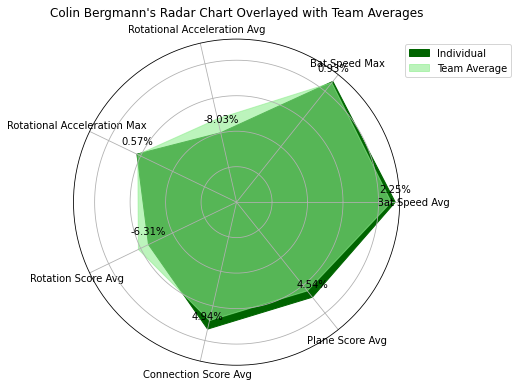

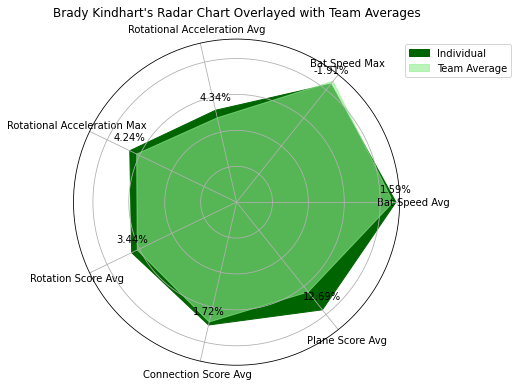

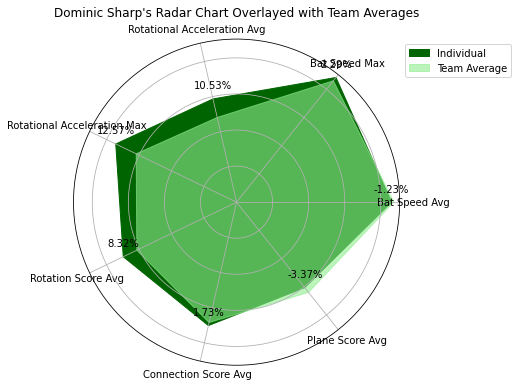

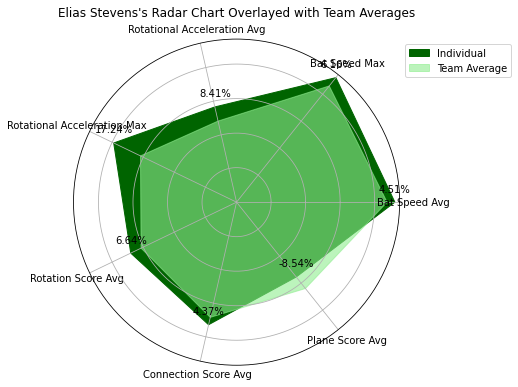

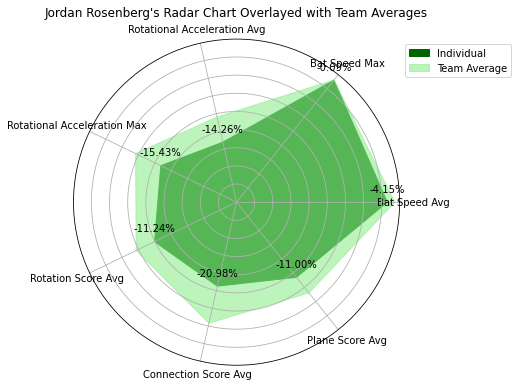

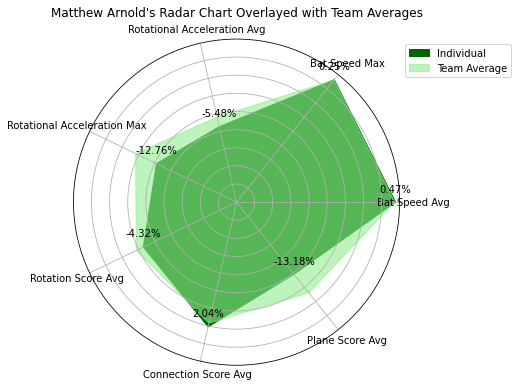

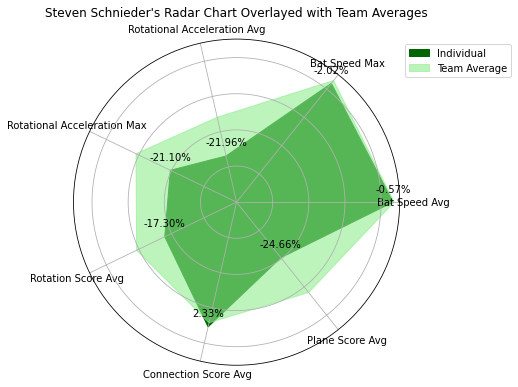

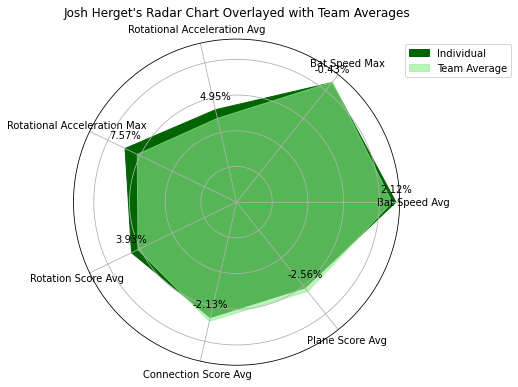

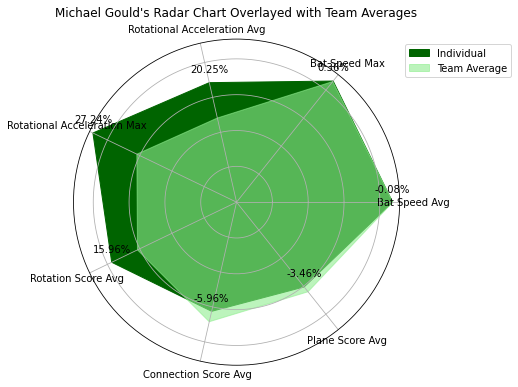

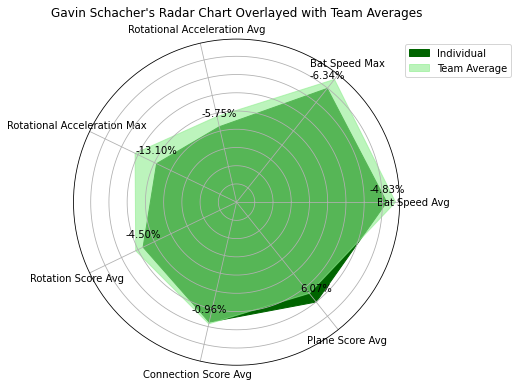

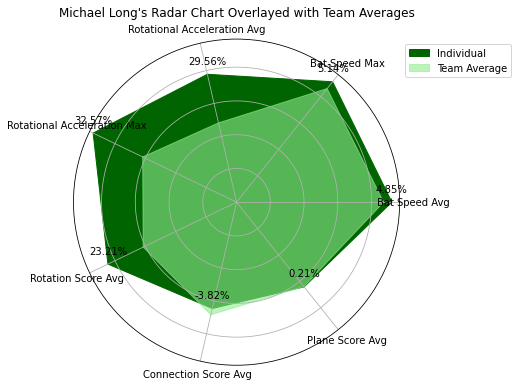

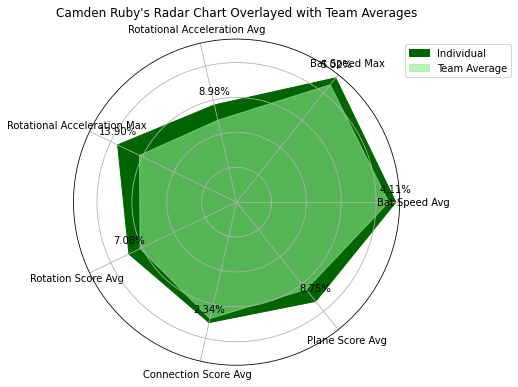

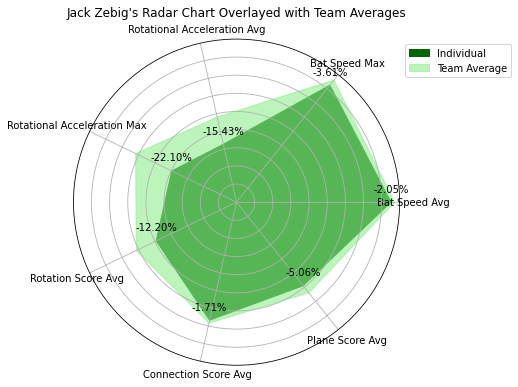

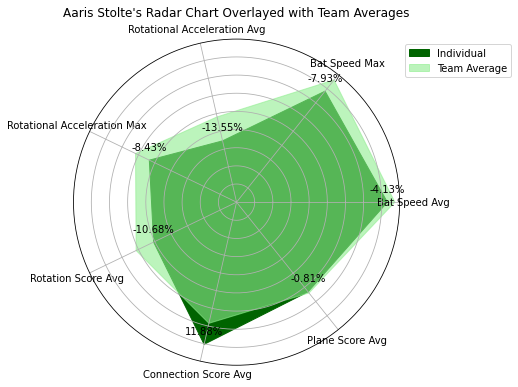

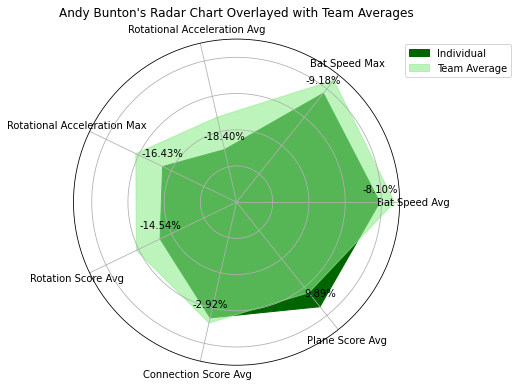

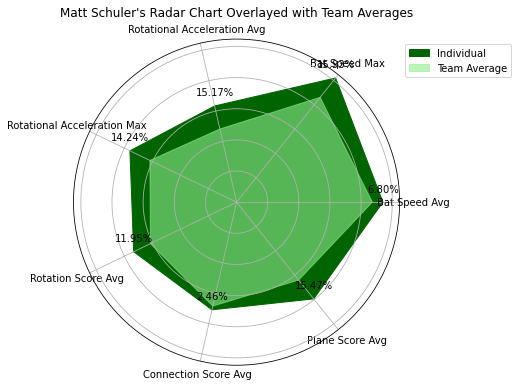

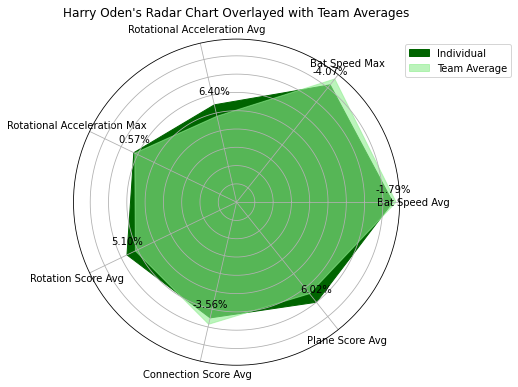

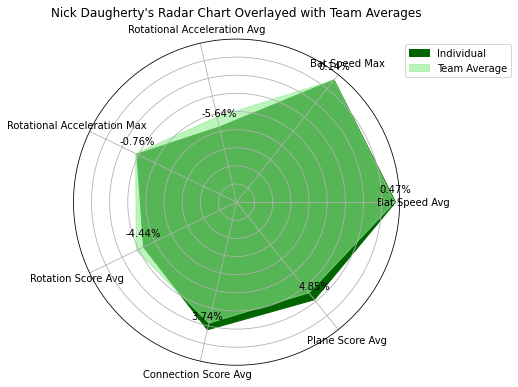

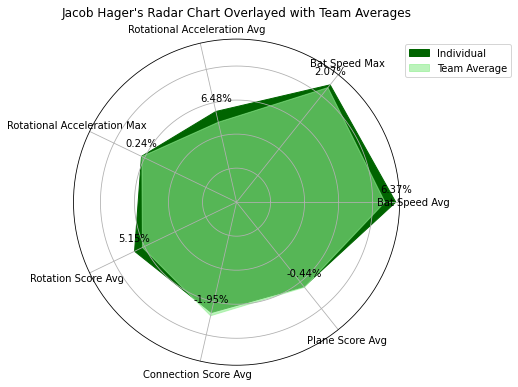

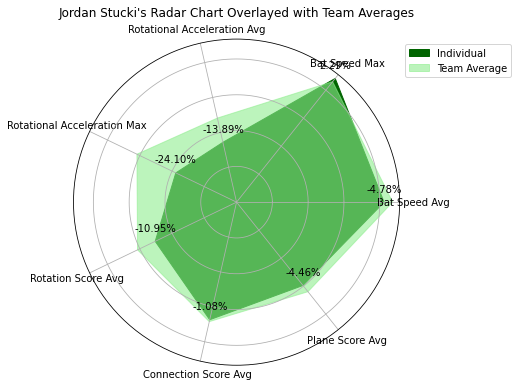

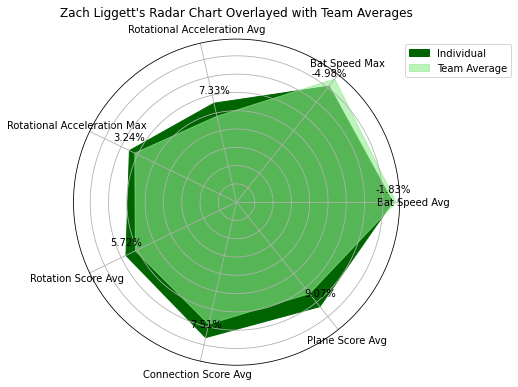

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of player names
player_names = [
    "Colin Bergmann", "Brady Kindhart", "Dominic Sharp", "Elias Stevens",
    "Jordan Rosenberg", "Matthew Arnold", "Steven Schnieder", "Josh Herget",
    "Michael Gould", "Gavin Schacher", "Michael Long", "Camden Ruby",
    "Jack Zebig", "Aaris Stolte", "Andy Bunton", "Matt Schuler",
    "Harry Oden", "Nick Daugherty", "Jacob Hager", "Jordan Stucki",
    "Zach Liggett"
]

# Initialize an empty DataFrame to store team averages
team_stats_df = pd.DataFrame()

# Outer limits for scaling to percentages
outer_limits = {
    "Bat Speed Avg": 77,
    "Bat Speed Max": 88,
    "Rotational Acceleration Avg": 26,
    "Rotational Acceleration Max": 30,
    "Rotation Score Avg": 80,
    "Connection Score Avg": 80,
    "Plane Score Avg": 80
}

# Loop over all players to read their Excel sheet and calculate the metrics
for name in player_names:
    try:
        sheet = pd.read_excel('/Users/ivanquackenbush/Documents/Maryville baseball/Latest Report.xlsx', 
                              sheet_name=name, skiprows=8, engine='openpyxl')
        
        avg_stats = {
            'Bat Speed Avg': sheet['Bat Speed (mph)'].mean(),
            'Bat Speed Max': sheet['Bat Speed (mph)'].max(),
            'Rotational Acceleration Avg': sheet['Rotational Acceleration (g)'].mean(),
            'Rotational Acceleration Max': sheet['Rotational Acceleration (g)'].max(),
            'Rotation Score Avg': sheet['Rotation Score'].mean(),
            'Connection Score Avg': sheet['Connection Score'].mean(),
            'Plane Score Avg': sheet['Plane Score'].mean()
        }
        avg_stats["Name"] = name
        team_stats_df = team_stats_df.append(avg_stats, ignore_index=True)
    
    except Exception as e:
        print(f"An error occurred while processing the sheet for {name}: {str(e)}")

# Calculate team averages
team_avgs = team_stats_df.mean()

# Scale team averages to percentages
scaled_team_avgs = [(team_avgs[label] / outer_limits[label]) * 100 for label in outer_limits.keys()]

# Labels for the radar chart
labels = outer_limits.keys()

# Create radar charts
for index, row in team_stats_df.iterrows():
    scaled_values = [(row[label] / outer_limits[label]) * 100 for label in labels]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    ax.fill(angles, scaled_values, color='darkgreen', alpha=1)
    ax.fill(angles, scaled_team_avgs, color='lightgreen', alpha=0.6)
    
    # Add percent difference annotations
    for i, angle in enumerate(angles):
        diff = scaled_values[i] - scaled_team_avgs[i]
        ax.annotate(f"{diff:.2f}%", (angle, scaled_values[i]), textcoords="offset points", xytext=(0,10), ha='center', color='black')

    ax.set_xticks(angles)
    ax.set_xticklabels(labels)
    ax.yaxis.grid(True)
    ax.set_yticklabels([])

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), labels=['Individual', 'Team Average'])
    plt.title(f"{row['Name']}'s Radar Chart Overlayed with Team Averages")
    plt.show()
